<a href="https://colab.research.google.com/github/EduardoRosaTech/Credit-EDA-and-Analysis/blob/main/Credit_EDA_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration and Analysis of Credit Data with SQL**


# **The Data:**
The data represents information about bank customers and includes the following columns:

idade = customer's age

sexo = customer's gender (F or M)

dependentes = number of dependents the customer has

escolaridade = customer's education level

salario_anual = customer's annual salary range

tipo_cartao = type of card the customer has

qtd_produtos = number of products purchased in the last 12 months

iteracoes_12m = number of interactions/transactions in the last 12 months

meses_inativo_12m = number of months the customer was inactive

limite_credito = customer's credit limit

valor_transacoes_12m = transaction value in the last 12 months

qtd_transacoes_12m = number of transactions in the last 12 months

The table was created in AWS Athena along with the S3 Bucket with a version of the data available at: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **Data Exploration:**
The first phase of analysis is to understand what we have in our raw data. Let's start with data exploration:

How much information do we have in our database?

Query: SELECT count(*) FROM credito

Answer: 2564 rows

Note: The database from the link above contains more rows than the selected sample. You can use all the rows or consider only a fraction of the data. In practice, the more data you use, the more reliable the analysis will be! However, there are computational and financial limits where reducing the data for analysis for study purposes becomes interesting.

# **What does the data look like?**

Query: SELECT * FROM credito LIMIT 10;


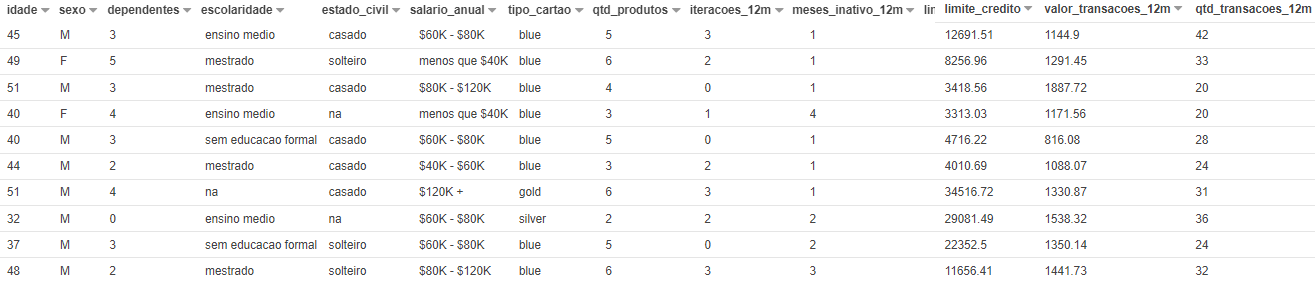

It is noticeable that there are some null values in the table (value na). Let's take a closer look at the values in each column!

# **What are the data types of each column?**

Query: DESCRIBE credito

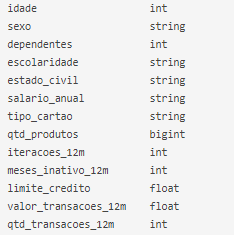

Now that we understand the data types, let's take a closer look at the variables that are not numeric.

# **What are the types of education available in the dataset?**

Query: SELECT DISTINCT escolaridade FROM credito

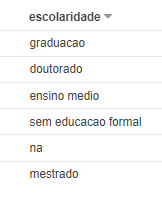

The data includes several levels of education, and it's noticeable that we have null values (na) in the dataset. We'll address this later!

Do we have more null values?

# **What are the types of marital status available in the dataset?**

Query: SELECT DISTINCT estado_civil FROM credito

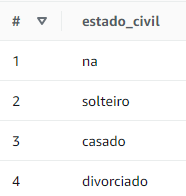

Once again, we've found null values in the marital status data!

# **What are the distinct annual salary ranges available in the dataset?**

Query: SELECT DISTINCT salario_anual FROM credito

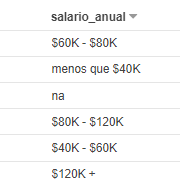

The salaries in this dataset are not exact values of what each customer earns. Instead, they are reported in salary ranges. There are also null values present in this column.

# **What are the distinct card types available in the dataset?**

Query: SELECT DISTINCT tipo_cartao FROM credito

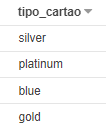

Here we can see that there is no need to handle null values for card types.



# **Data Analysis**
Now that we've explored the data and understood the information available in our database, we can analyze it to understand what's happening.

#Let's ask questions: In this database, how many customers do we have in each salary range?

Query: SELECT COUNT(*), salario_anual FROM credito GROUP BY salario_anual

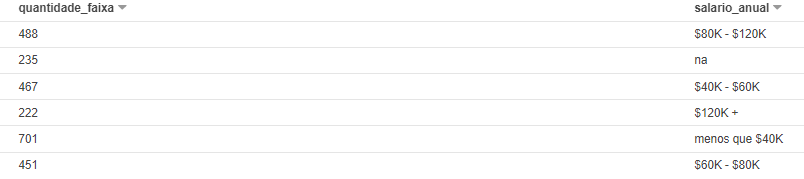

Most customers in this database have an income of less than 40K, and there are 235 customers who either did not report their salary range or it's not available. In a way, it could be interesting for the company to focus on this lower-income demographic.


***In this database, how many customers are male and how many are female?***

Query: SELECT COUNT(*), sexo FROM credito GROUP BY sexo

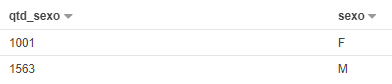

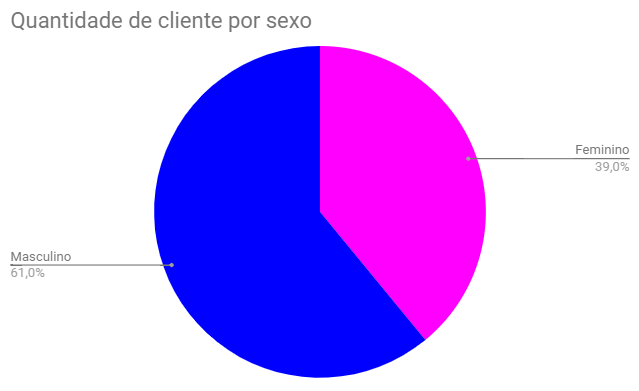


The majority of customers in this database are male! From the extracted CSV data, it's possible to generate a pie chart for better visualization of male/female distribution.

# **What are the characteristics of customers with the highest credit limits?**

Query: SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' AND tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito DESC
LIMIT 10

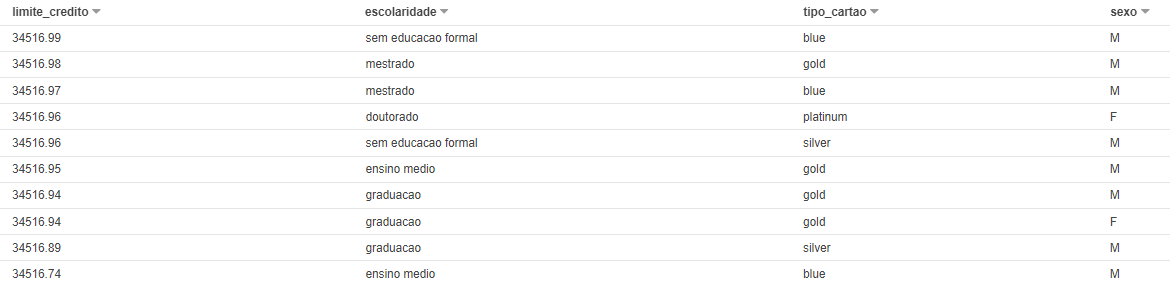

It doesn't seem like education has an impact on the credit limit. The highest limit is offered to a male without formal education. The card type also doesn't appear to be related to education or the limit. Among the highest limits, we find customers with gold, silver, platinum, and blue cards.



# **What are the characteristics of customers with the lowest credit limits?**

Query: SELECT MIN(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' AND tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito ASC

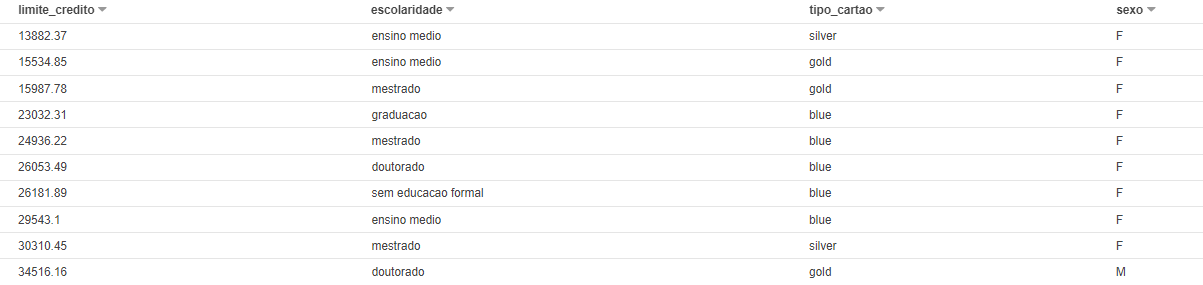

This time we can see that there are no customers with platinum cards among those with the lowest limits. It's also noticeable that the majority of customers with the lowest limits are women, while men predominate among those with the highest limits.

# **Does salary impact the credit limit?**

Query: SELECT AVG(qtd_produtos) AS qts_produtos, AVG(valor_transacoes_12m) AS media_valor_transacoes, AVG(limite_credito) AS media_limite, sexo, salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY AVG(valor_transacoes_12m) DESC

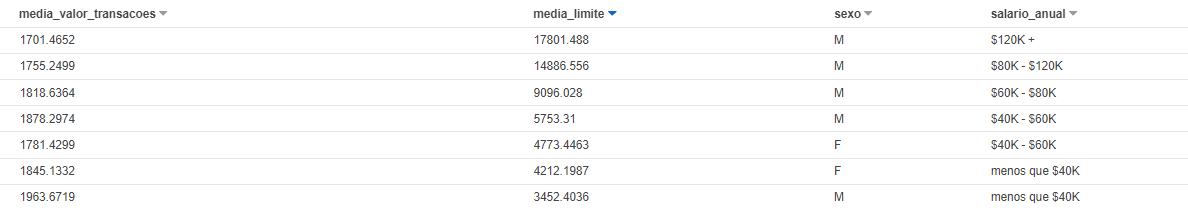

YES! People with lower salary ranges also have lower credit limits!

# **Here are some insights extracted from the credit dataset:**

# Some interesting findings:

* The majority of customers have incomes up to 40K.
* Most customers are male!
* Education level does not seem to influence credit limit or card type.
* Customers with the highest credit limits are mostly male.
* Customers with the lowest credit limits are mostly female.
* Among those with the lowest limits, there is no presence of platinum cards.
* Salary range directly impacts credit limit.
* There are no female customers with an annual salary above 60K.

Further exploration of the data could explain why women have lower credit limits. This could also reflect cultural issues that may need reconsideration. A more detailed analysis could help uncover other relevant factors.